# Acceptability conditions of models with polytropic EoS (energy density)

This notebook graphically shows the parameter space ($n, \sigma$), based on the number of acceptability conditions fulfilled, for relativistic anisotropic spheres with polytropic (II) equation of state
\begin{equation}
    P = \kappa \rho^{1+\frac{1}{n}}
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
import math
from scipy import integrate
from numpy import diff
from scipy.integrate import solve_ivp

In [2]:
plt.rc('text', usetex = True)
plt.rc('font', **{'family' : "sans-serif"})
params = {'text.latex.preamble' : [r'\usepackage{amssymb}']}   # amssymb
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

# Compact object modeling

## Structure equations

The structure equations are the result of manipulating the Einstein field equations for a given metric and energy tensor. They are the equations to be solved to model compact objects. In the case of static conigurations, with spherical symmetry and anisotropic pressure, the structure equations consist of
\begin{eqnarray}
P^{\prime} &=& - \left(\rho + P \right) \frac{m + 4 \pi r^{3} P}{r(r - 2m)} + \frac{2}{r} \left(P_{\perp} - P \right)  \label{EqHid} \tag{1} \\
m^{\prime} &=& 4 \pi r^{2} \rho \label{MasDif} \tag{2}
\end{eqnarray}
where $\rho$ is energy density, $m$ is mass, $P$ is radial pressure and $P_{\perp}$ is tangential pressure. The prime denotes derivative with respect to $r$.

## Equation of State

An equation of state (EoS) is a mathematical model between state variables that describes the most important physical processes that occur in a thermodynamic system. The polytropic (II) EoS consists of a relationship such that
\begin{equation}
P = \kappa \rho^{1+\frac{1}{n}}\,. \label{PoliII} \tag{3}
\end{equation}

On the other hand, the anisotropic pressure is supposed to be of the form
\begin{equation}
\Delta\equiv P_{\perp} - P = C r (\rho + P) \frac{m + 4 \pi r^3 P}{r(r-2m)} \,, \label{Anisotropia} \tag{4}
\end{equation}
such that equation $\eqref{EqHid}$ is as
\begin{equation}
\frac{\mathrm{d}P}{\mathrm{d}r} = - h \frac{(\rho + P)(m + 4 \pi  r^3 P)}{r(r-2m)} \,, \label{EqHidCos} \tag{5}
\end{equation}
where $h = 1 - 2C$, and $C$ quantifies the anisotropy in the model.

## Lane-Emden equation

The structure equations can be written dimensionless when they are endowed with polytropic EoS. The result is known as the Lane-Emden equation, given by the change of variables
\begin{equation}
\psi^{n} \left(\xi \right) = \frac{\rho}{\rho_{c}} \ , \ \ \eta \left(\xi \right) = \frac{m}{4 \pi \rho_c a^{3}} \quad \textrm{and} \quad r = a\xi \,,
\end{equation}
where
\begin{equation}
a^{2} = \frac{\sigma \left(n + 1 \right)}{4 \pi \rho_c} \quad \textrm{and} \quad \sigma = \frac{P_{c}}{\rho_{c}}  \,.
\end{equation}
The subscript $c$ indicates that the variable is evaluated at the center of the configuration.

In this way, the dimensionless EoS $\eqref{PoliII}$ and $\eqref{Anisotropia}$ are
\begin{eqnarray}
P &=& \kappa \rho_{c}^{1 + \frac{1}{n}} \psi^{n+1} =  P_c \psi^{n+1} \quad \textrm{y} \label{PAdi} \tag{6} \\
\Delta &=& \frac{C (n+1) \left(\eta + \sigma \xi^{3} \psi^{n+1} \right)}{\xi - 2 \sigma (n+1)  \eta} (\psi^{n} + \sigma \psi^{n+1}) P_{c} \,, \label{AniAdi} \tag{7}
\end{eqnarray}
respectively. From which it is clear that $\sigma = \kappa \rho_{c}^{1/n}$.

Finally, equations $\eqref{EqHidCos}$ and $\eqref{MasDif}$, written in dimensionless form, are
\begin{eqnarray}
\dot{\psi} &=& - \frac{h(\eta + \sigma \xi^{3} \psi^{n+1})(1 + \sigma \psi)}{\xi \left\{\xi - 2 \sigma (n+1) \eta \right\}} \label{PsiPunto} \tag{8} \qquad \textrm{y} \\
\dot{\eta} &=& \xi^{2}\psi^{n} \label{EtaPunto} \tag{9} \,,
\end{eqnarray}
where dot indicates derivative with respect to $\xi$.

Therefore, the system of equations to integrate numerically is given by $\eqref{PsiPunto}$ and $\eqref{EtaPunto}$, with initial conditions
\begin{equation}
\psi (\xi = 0) = \psi_{c} = 1 \,, \quad \eta (\xi = 0) = \eta_{c} = 0  \,,
\end{equation}
and boundary condition
\begin{equation}
\psi(\xi = \xi_{b}) = 0 \,.
\end{equation}

In [3]:
# Defining system of equations: derivative of Psi and derivative of Eta as a function of xi
def funciones(xi,y, sigma, n, h):
    psi_, eta_ = y
    dydxi = [-h*(eta_ + sigma*xi**(3)*psi_**(n+1))*(1 + sigma*psi_)/xi/(xi - 2*(n+1)*sigma*eta_)
             ,xi**(2)*psi_**(n)]
    return dydxi

In [4]:
# The input parameters that characterize each model are defined: n, C, sigma

Lista_n = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]        # List of polytropic indices n
print('Values for n: ',end='')                                                    
print(*Lista_n, sep=', ')

Lista_C = [-0.25,-0.025,0.0,0.025,0.25]   # List of anisotropic factors C
print('Values for C: ',end='')
print(*Lista_C, sep=', ')
   
# List of sigmas
Lista_sigma = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8]
print('Values for \u03c3: ',end='')
print(*Lista_sigma, sep=', ')

# Total number of models evaluated
Numero_de_modelos = len(Lista_n)*len(Lista_C)*len(Lista_sigma)
print('Number of models: ', Numero_de_modelos)

Values for n: 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0
Values for C: -0.25, -0.025, 0.0, 0.025, 0.25
Values for σ: 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8
Number of models:  640


In [5]:
ListaModelos = []                                        # Container for all models

contador = 0

for i in range(len(Lista_C)):
    
    ListaModelos.append([])                              # Container for C
    
    C = Lista_C[i]
    h = 1 - 2*C
    
    for j in range(len(Lista_n)):
        
        ListaModelos[i].append([])                       # Container for n
        
        n = Lista_n[j]
        
        for k in range(len(Lista_sigma)):
            
            ListaModelos[i][j].append([])                # Container for sigma
            
            sigma = Lista_sigma[k]
                         
            # Initial conditions
            Psi0 = 1.0
            Eta0 = 0.0
            y0 = [Psi0,Eta0]
            
            # Integration interval
            xi0 = 10**(-15) # Start
            ximax = 10000   # End, in case the condition to stop integration is not fulfilled
            xi_span = (xi0,ximax) # Integration space
            
            # Condition to stop integration (Dimensionless pressure less than 10**(-15))
            def stop_condition(xi,y,sigma,n,h):
                return y[0] - 10**(-15)
            stop_condition.terminal = True
            
            # Solution of the system of equations using the routine "solve_ivp" by means of the RK45 method
            # solve_ivp(Equations to integrate, Integration space, Initial conditions, Integration method,
            #           Condition to stop integration)
            soluciones = solve_ivp(funciones,xi_span,y0,method='RK45',events=stop_condition,
                                   args=(sigma,n,h))
            
            if soluciones.status != 0:
                xi = soluciones.t
                Psi = soluciones.y[0]
                Eta = soluciones.y[1]
            else:
                ListaModelos[i][j][k] = ('gray','X',12),C,n,sigma
                print('Models without boundary. Parameters: ',f'C = {C}, n = {n}, \u03c3 = {sigma}')
                contador = contador + 1
                continue
                
            
            # Derivative of Psi
            Psi1 = -h*(Eta + sigma*xi**(3)*Psi**(n+1))*(1 + sigma*Psi)/xi/(xi - 2*(n+1)*sigma*Eta)
    
            # Derivative of Eta
            Eta1 = xi**(2)*Psi**(n)
    
            # Xi normalized
            xiNorm = xi/xi[-1]
            
        ### Condition C1

            compacidad = 2*sigma*(n+1)*Eta/xi

        ### Condition C2
                
            # Energy density
            Densidad = Psi**(n)
            
            # Pressure divided by central pressure
            PNorm = Psi**(n+1)
            
            # Tangential pressure divided by central pressure
            PTNorm = (C*(n+1)*(Eta + sigma*Psi**(n+1)*xi**(3))/(xi - 2*Eta*sigma*(n+1)))*(Psi**(n) + sigma*Psi**(n+1)) + Psi**(n+1)
            
            C2 = [Densidad, PNorm, PTNorm]
            
        ### Condition C3
            
            # Energy density gradient
            GradDenEner = n*Psi**(n-1)*Psi1  
            
            # Radial pressure gradient
            Pprima = (n+1)*Psi**(n)*Psi1
            
            # Tangential pressure gradient
            Ptprima = C*(n+1)*((Eta1 + 3*sigma*xi**(2)*Psi**(n+1) + sigma*(n+1)*xi**(3)*Psi**(n)*Psi1)*(Psi**(n) + sigma*Psi**(n+1))/(xi - 2*Eta*(n+1)*sigma) + (Eta + sigma*xi**(3)*Psi**(n+1))*(n*Psi**(n-1)*Psi1 + sigma*(n+1)*Psi**(n)*Psi1)/(xi - 2*Eta*(n+1)*sigma) - (Eta + sigma*xi**(3)*Psi**(n+1))*(Psi**(n) + sigma*Psi**(n+1))*(1 - 2*Eta1*(n+1)*sigma)/(xi - 2*Eta*(n+1)*sigma)**(2)) + (n+1)*Psi**(n)*Psi1
            
            C3 = [GradDenEner,Pprima,Ptprima]
            
        ### Condition C4
        
            # Trace Energy Condition (TEC)
            TEC = (1/sigma)*Densidad - PNorm - 2*PTNorm 
            
        ### Condition C5
            
            # Radial speed of sound squared
            v2r = sigma*(1 + 1/n)*Psi
            
            # Difference between speeds of sound squared
            vDelta2 = (C*sigma*(n+1)/(xi-2*sigma*(n+1)*Eta))*((1+sigma*(n+1)*Psi/n)*(Eta+sigma*xi**(3)*Psi**(n+1)) + (1+sigma*Psi)*xi**(2)*Psi**(n+1)*((1+3*sigma*Psi)/Psi1 + sigma*(n+1)*xi)/n - (1+sigma*Psi)*Psi*(Eta+sigma*xi**(3)*Psi**(n+1))*(1-2*sigma*(n+1)*xi**(2)*Psi**(n))/n/Psi1/(xi-2*sigma*(n+1)*Eta))
        
            # Tangential speed of sound squared
            v2t = vDelta2 + v2r
            
            C5 = [v2r, v2t]
            
        ### Condition C6
            
            # Adiabatic index Gamma
            Gamma = v2r*(Densidad + sigma*PNorm)/PNorm/sigma
            
        ### Condition C8
        
            # Second derivative of Psi
            Psi11 = h*(((Eta1 + 3*sigma*xi**(2)*Psi**(n+1) + sigma*xi**(3)*(n+1)*Psi**(n)*Psi1)*(sigma*Psi + 1)/xi/(2*(n+1)*sigma*Eta - xi)) + (sigma*Psi1*(Eta + sigma*xi**(3)*Psi**(n+1))/xi/(2*(n+1)*sigma*Eta - xi)) - ((1 + sigma*Psi)*(Eta + sigma*xi**(3)*Psi**(n+1))/xi**(2)/(2*(n+1)*sigma*Eta - xi)) - ((1 + sigma*Psi)*(Eta + sigma*xi**(3)*Psi**(n+1))*(2*(n+1)*sigma*Eta1 - 1)/xi/((2*(n+1)*sigma*Eta - xi)**(2))))
            
            # Cracking: deltaR1: Density, deltaR2: Mass, deltaR3: Pressure, delta R4: Pressure gradient   
            deltaR1 = h*((n+1)*sigma*(Eta + xi**(3)*sigma*Psi**(n+1))/xi/(xi - 2*sigma*n*Eta - 2*sigma*Eta))
            deltaR2 = h*(Psi**(n+1)*xi**(2)*sigma*(n+1)*(1 + sigma * Psi)*(1 + 2*xi**(2)*sigma*sigma*(n+1)*Psi**(n+1))/n/Psi1/((xi - 2*Eta*sigma*n - 2*Eta* sigma)**(2)))
            deltaR3 = h*(sigma*(n+1)**(2)*sigma*Psi*(Eta + xi**(3)*Psi**(n) + 2*sigma*xi**(3)*Psi**(n+1))/n/xi/(xi - 2*sigma*n*Eta - 2*sigma* Eta))
            deltaR4 = sigma*(n+1)*(n*Psi1**(2) + Psi*Psi11)/n/Psi1
            
            deltaRPolitropa = deltaR1 + deltaR2 + deltaR3 + deltaR4
            
        ### Condition C9
            
            # Buoyancy
            Psin11 = n*(Psi**(n-1)*Psi11 + (n-1)*Psi**(n-2)*Psi1**(2))
            
#######################################################################################################################
            
            # C1
            
            if any(compacidad >= 1):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # C2
            
            if any(Densidad < 0) or any(PNorm < 0) or any(PTNorm < 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # C3
            
            if any(GradDenEner > 0) or any (Pprima > 0) or any (Ptprima[10:] > 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            

            # C4
            
            if any(TEC < 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # C5
            
            if any(v2r > 1) or any(v2t > 1):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # C6
            
            if any(Gamma < 4/3):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # C7

            if n == 0.5 :
                    
                if C == 1/8 and sigma >= 0.775 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 5/32 and sigma >= 0.675 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 3/16 and sigma >= 0.6 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 7/32  and sigma >= 0.5 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 1/4 and sigma >= 0.425 :
                    ListaModelos[i][j][k].append(1)
                    
                else:
                    pass
            
            elif n == 1.0 :
            
                if C == 0 and sigma >= 0.4 :
                    ListaModelos[i][j][k].append(1)
            
                elif C == 1/32 and sigma >= 0.375 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 1/16 and sigma >= 0.35 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 3/32 and sigma >= 0.3 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 1/8 and sigma >= 0.275 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 5/32 and sigma >= 0.25 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 3/16 and sigma >= 0.225 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 7/32  and sigma >= 0.2 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 1/4 and sigma >= 0.175 :
                    ListaModelos[i][j][k].append(1)
                else:
                    pass
                    
            elif n == 1.5 :
            
                if C == 0 and sigma >= 0.175 :
                    ListaModelos[i][j][k].append(1)
            
                elif C == 1/32 and sigma >= 0.175 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 1/16 and sigma >= 0.15 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 3/32 and sigma >= 0.15 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 1/8 and sigma >= 0.125 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 5/32 and sigma >= 0.125 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 3/16 and sigma >= 0.1 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 7/32  and sigma >= 0.1 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 1/4 :
                    ListaModelos[i][j][k].append(1)
                
                else:
                    pass    
            
            elif n == 2.0 :
            
                if C == 0 :
                    ListaModelos[i][j][k].append(1)
            
                elif C == 1/32 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 1/16  :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 3/32 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 1/8 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 5/32 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 3/16 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 7/32 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 1/4 and sigma <= 0.825 :
                    ListaModelos[i][j][k].append(1)
                    
                else:
                    pass    
            
            elif n == 2.5 :
            
                if C == 0 :
                    ListaModelos[i][j][k].append(1)
            
                elif C == 1/32 and sigma <= 0.825 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 1/16 and sigma <= 0.775 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 3/32 and sigma <= 0.725 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 1/8 and sigma <= 0.675 :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 5/32 and sigma <= 0.625 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 3/16 and sigma <= 0.55 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 7/32  and sigma <= 0.5 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 1/4 and sigma <= 0.45 :
                    ListaModelos[i][j][k].append(1)
                    
                else:
                    pass
                    
            elif n == 3.0 :
            
                if C == 0 and sigma <= 0.475 :
                    ListaModelos[i][j][k].append(1)
            
                elif C == 1/32 and sigma <= 0.45 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 1/16 and sigma <= 0.425 :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 3/32 and (sigma <= 0.4 or sigma >= 0.85) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 1/8 and (sigma <= 0.375 or sigma >= 0.75) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 5/32 and (sigma <= 0.35 or sigma >= 0.675) :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 3/16 and (sigma <= 0.325 or sigma >= 0.6) :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 7/32  and (sigma <= 0.3 or sigma >= 0.525) :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 1/4 and (sigma <= 0.25 or sigma >= 0.45) :
                    ListaModelos[i][j][k].append(1)
                    
                else:
                    pass      
            
            elif n == 3.5 :
            
                if C == 0 and (sigma <= 0.25 or sigma >= 0.325) :
                    ListaModelos[i][j][k].append(1)
            
                elif C == 1/32 and (sigma <= 0.25 or sigma >= 0.3) :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 1/16 and (sigma <= 0.225 or sigma >= 0.275) :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 3/32 and (sigma <= 0.225 or sigma >= 0.25) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 1/8 and (sigma <= 0.2 or sigma >= 0.25) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 5/32 and (sigma <= 0.2 or sigma >= 0.225) :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 3/16 and (sigma <= 0.175 or sigma >= 0.2) :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 7/32  and (sigma <= 0.15 or sigma >= 0.175) :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 1/4 and (sigma <= 0.15 or sigma >= 0.175) :
                    ListaModelos[i][j][k].append(1)
                    
                else:
                    pass      
            
            elif n == 4.0 :
            
                if C == 0 and (sigma <= 0.125 or sigma >= 0.15) :
                    ListaModelos[i][j][k].append(1)
            
                elif C == 1/32 and (sigma <= 0.1 or sigma >= 0.15) :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 1/16 and (sigma <= 0.1 or sigma >= 0.125) :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 3/32 and (sigma <= 0.1 or sigma >= 0.125 ):
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 1/8 and (sigma <= 0.125 or sigma >= 0.4) :
                    ListaModelos[i][j][k].append(1)
                    
                elif C == 5/32 and (sigma <= 0.1 or sigma >= 0.375) :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 3/16 and (sigma <= 0.1 or sigma >= 0.35) :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 7/32 and (sigma <= 0.1 or sigma >= 0.325) :
                    ListaModelos[i][j][k].append(1)
                
                elif C == 1/4 and (sigma <= 0.275 or sigma >= 0.5) :
                    ListaModelos[i][j][k].append(1)
                    
                else:
                    pass
                
            else:
                pass
                    
            # C8
           
            if any(np.diff(np.sign(deltaRPolitropa[1:])) != 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass

            # C9
            
            if any(Psin11 > 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass            
            
            ListaModelos[i][j][k] = (('red','o',12) if len(ListaModelos[i][j][k]) == 0
                                     else ('blue','o',12) if len(ListaModelos[i][j][k]) == 1
                                     else ('green','o',12) if len(ListaModelos[i][j][k]) == 2
                                     else ('darkorange','o',12) if len(ListaModelos[i][j][k]) == 3
                                     else ('purple','o',12) if len(ListaModelos[i][j][k]) == 4
                                     else ('white','o',0)),(C,n,sigma)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


Models without boundary. Parameters:  C = -0.25, n = 3.5, σ = 0.45
Models without boundary. Parameters:  C = -0.25, n = 3.5, σ = 0.5
Models without boundary. Parameters:  C = -0.25, n = 3.5, σ = 0.55
Models without boundary. Parameters:  C = -0.25, n = 3.5, σ = 0.6
Models without boundary. Parameters:  C = -0.25, n = 4.0, σ = 0.2
Models without boundary. Parameters:  C = -0.25, n = 4.0, σ = 0.25
Models without boundary. Parameters:  C = -0.25, n = 4.0, σ = 0.3
Models without boundary. Parameters:  C = -0.25, n = 4.0, σ = 0.35
Models without boundary. Parameters:  C = -0.25, n = 4.0, σ = 0.4
Models without boundary. Parameters:  C = -0.25, n = 4.0, σ = 0.45
Models without boundary. Parameters:  C = -0.25, n = 4.0, σ = 0.5
Models without boundary. Parameters:  C = -0.25, n = 4.0, σ = 0.55
Models without boundary. Parameters:  C = -0.25, n = 4.0, σ = 0.6
Models without boundary. Parameters:  C = -0.25, n = 4.0, σ = 0.65
Models without boundary. Parameters:  C = -0.25, n = 4.0, σ = 0.7
Mod

In [6]:
print(contador, ' out of ', Numero_de_modelos, ' does not have boundary')

81  out of  640  does not have boundary


## * Condition C1: $\, \, \frac{2m}{r} < 1$

The compactness $\mu$ is given by
\begin{equation}
    \mu = \frac{2m}{r} \equiv \frac{2 \sigma \left(n+1 \right) \eta}{\xi}
\end{equation}

## * Condition C2: $\,\, \rho \geq 0$, $\,\,P \geq 0$, $\,\,P_{\perp} \geq 0$

The dimensionless energy density, radial pressure and tangential pressure are:
\begin{eqnarray}
     \frac{\rho}{\rho_{c}} &=& \psi^{n} \,, \\
     \frac{P}{P_{c}} &=& \psi^{n+1} \qquad \textrm{and} \\
     \frac{P_{\perp}}{P_{c}} &=& \frac{C(n+1)\left(\eta + \sigma \xi^{3} \psi^{n+1} \right)\left( \psi^{n} + \sigma \psi^{n+1} \right)}{\xi - 2 \sigma (n+1) \eta} + \psi^{n+1} \,,
\end{eqnarray}
respectively.

## * Condition C3: $\,\, \rho^{\prime} \leq 0$, $\,\,P^{\prime} \leq 0$, $\,\,P^{\prime}_{\perp} \leq 0$

The dimensionless gradients of energy density, radial pressure and tangential pressure are:
\begin{eqnarray}
\frac{\dot{\rho}}{\rho_{c}} &=& n \psi^{n-1} \dot{\psi} \label{GradDenII} \,, \\
\frac{\dot{P}}{P_{c}} &=& (n+1) \psi^{n} \dot{\psi} \label{GradPII} \qquad \textrm{and} \\
\frac{\dot{P}_{\perp}}{P_{c}} &=& \frac{C\sigma\left(n+1\right)}{\xi-2\sigma\left(n+1\right)\eta} \Bigg\{\psi^{n-1}\dot{\psi}\left\{n+\sigma\left(n+1\right)\psi\right\}\left(\eta+\sigma\xi^{3}\psi^{n+1}\right) + \left(1+\sigma\psi\right)\xi^{2}\psi^{2n}\left\{1+3\sigma\psi+\sigma\left(n+1\right)\xi\dot{\psi}\right\} \nonumber \\
    && - \; \Bigg. \frac{\psi^{n}\left(1+\sigma\psi\right)\left(\eta+\sigma\xi^{3}\psi^{n+1}\right)\left\{1-2\sigma\left(n+1\right)\dot{\eta}\right\}}{\xi-2\sigma\left(n+1\right)\eta} \Bigg\} + \; (n+1) \psi^{n} \dot{\psi} \label{GradPtII} \,, 
\end{eqnarray}
respectively.

## * Condition C4: $\,\, \rho - P - 2 P_{\perp} \geq 0$

The condition on the trace of the energy-momentum tensor is
\begin{equation}
    \frac{\psi^{n}}{\sigma} - 3\psi^{n+1} - \frac{2C(n+1) \left(\eta + \sigma \xi^{3} \psi^{n+1} \right) \left(\psi^{n} + \sigma \psi^{n+1} \right)}{\xi - 2 \sigma (n+1) \eta}
\end{equation}

## * Condition C5: $\,\, 0 < v_{s}^{2} \leq 1 \,\, $ and $\,\,0 < v_{s \perp}^{2} \leq 1$

The dimensionless radial and tangential speeds of sound are
\begin{eqnarray}
    v^{2}_{s} &=& \sigma \left(\frac{n+1}{n} \right) \psi \qquad \textrm{and} \\
    v^{2}_{s \perp} &=& \frac{C \sigma \left(n+1\right)}{\xi - 2\sigma\left(n+1\right)\eta} \bigg\{\left( 1 + v^{2}_{s}\right) \left(\eta + \sigma \xi^{3} \psi^{n+1} \right) + \frac{\left(1+\sigma\psi\right) \xi^{2} \psi^{n+1}}{n}  \left\{\frac{1+3\sigma\psi}{\dot{\psi}} + \sigma \left(n+1\right)\xi\right\} \nonumber \\
    && -  \; \left. \frac{\psi \left(1+\sigma\psi\right) \left(\eta+\sigma\xi^{3}\psi^{n+1} \right)\left\{1 - 2\sigma\left(n+1\right)\xi^{2}\psi^{n}\right\} }{n \dot{\psi} \left\{\xi - 2\sigma \left(n+1\right)\eta \right\}} \right\} + v^{2}_{s} \,,
\end{eqnarray}
respectively.

## * Condition C6: $\,\, \Gamma \leq \frac{4}{3}$

The adiabatic index is
\begin{equation}
    \Gamma \equiv \frac{(n+1)\left(1 + \sigma \psi \right)}{n}
\end{equation}

## * Condition C7: $\,\, \frac{\mathrm{d}M(\rho_{c})}{\mathrm{d}\rho_{c}} > 0$

## * Condition C8: Sign change in the perturbed equilibrium equation

The perturbed equilibrium equation is given by
\begin{equation}
    \frac{\delta \mathcal{R}}{\delta \rho} = \underbrace{\frac{h \left(m + 4 \pi r^{3} P \right)}{r(r-2m)}}_{\mathcal{R}_{1}}  + \underbrace{\frac{h \left(\rho + P \right) \left(1 + 8 \pi P r^{2} \right)}{\left(r - 2m \right)^{2}} \, \frac{4 \pi r^{2} \rho}{\rho^{\prime}}}_{\mathcal{R}_{2}} + \underbrace{\frac{h \left\{m + 4 \pi r^{3} \left(\rho + 2 P \right) \right\}}{r(r-2m)} v^{2}}_{\mathcal{R}_{3}}  + \underbrace{\left\{\left(v^{2} \right)^{\prime} + v^{2} \frac{\rho^{\prime \prime}}{\rho^{\prime}} \right\}}_{\mathcal{R}_{4}} \,,
\end{equation}
where
\begin{equation}
    \mathcal{R} = \frac{\mathrm{d}P}{\mathrm{d}r} + h \frac{(\rho + P)(m + 4 \pi  r^3 P)}{r(r-2m)} = 0 \,.
\end{equation}

Therefore, the dimensionless perturbed hydrostatic equilibrium equation is
\begin{eqnarray}
a \frac{\delta \mathcal{R}}{\delta \rho} &\equiv& \frac{h \sigma \left(n+1 \right) \left(\eta + \sigma \xi^{3} \psi^{n+1}\right)}{\xi \left\{\xi - 2 \sigma\left(n+1 \right) \eta \right\}} + \frac{h \sigma (n+1) \xi^{2} \psi^{n+1} \left(1 + \sigma \psi \right) \left\{1 + 2 \sigma^{2} (n+1) \xi^{2} \psi^{n+1} \right\}}{n \dot{\psi} \left\{\xi - 2 \sigma (n+1) \eta \right\}^{2}} \nonumber \\
&& + \frac{h \sigma^{2} (n+1)^{2} \psi \left(\eta + \xi^{3}\psi^{n} + 2 \sigma \xi^{3} \psi^{n+1} \right)}{n \xi \left\{\xi - 2 \sigma (n+1) \eta \right\}} + \frac{\sigma (n+1) \left\{n  \left(\dot{\psi} \right)^{2} + \psi \ddot{\psi} \right\}}{n \dot{\psi}} =  \bar{\mathcal{R}}
\end{eqnarray}



## * Condition C9: $\,\, \rho^{\prime \prime} \leq 0$

The second derivative of dimensionless energy density is
\begin{equation}
    \ddot{\left(\Psi^{n}\right)} = n \left\{ \left(n-1 \right) \psi^{n-2} \left(\dot{\psi} \right)^{2} + \psi^{n-1} \ddot{\psi} \right\}
\end{equation}

In [7]:
legend_elements = [Line2D([0],[0],marker='o',color='w',label='9',markerfacecolor='red',markersize=6),
                   Line2D([0],[0],marker='o',color='w',label='8',markerfacecolor='blue',markersize=6),
                   Line2D([0],[0],marker='o',color='w',label='7',markerfacecolor='green',markersize=6),
                   Line2D([0],[0],marker='o',color='w',label='6',markerfacecolor='darkorange',markersize=6),
                   Line2D([0],[0],marker='o',color='w',label='5',markerfacecolor='purple',markersize=6),
                   Line2D([0],[0],marker='X',color='w',label='No boundary',markerfacecolor='gray',markersize=6)]

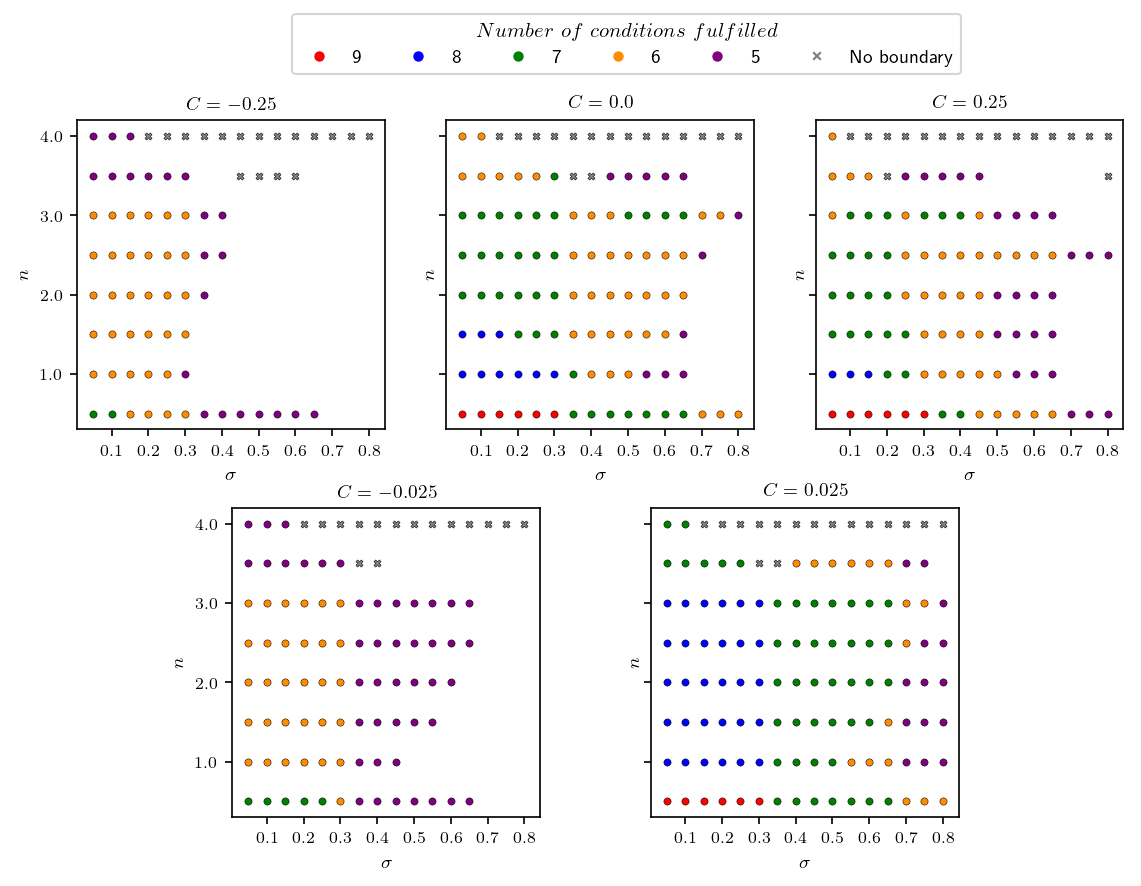

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(9,6),dpi=150)

for j in range(len(Lista_n)):
    
    for k in range(len(Lista_sigma)):
        
        axs[0,0].scatter(Lista_sigma[k],Lista_n[j],c=ListaModelos[0][j][k][0][0],marker=ListaModelos[0][j][k][0][1],
                         s=ListaModelos[0][j][k][0][2],edgecolors='k',linewidths=0.25)
        axs[0,1].scatter(Lista_sigma[k],Lista_n[j],c=ListaModelos[2][j][k][0][0],marker=ListaModelos[2][j][k][0][1],
                         s=ListaModelos[2][j][k][0][2],edgecolors='k',linewidths=0.25)
        axs[0,2].scatter(Lista_sigma[k],Lista_n[j],c=ListaModelos[4][j][k][0][0],marker=ListaModelos[4][j][k][0][1],
                         s=ListaModelos[4][j][k][0][2],edgecolors='k',linewidths=0.25)
        axs[1,0].scatter(Lista_sigma[k],Lista_n[j],c=ListaModelos[1][j][k][0][0],marker=ListaModelos[1][j][k][0][1],
                         s=ListaModelos[1][j][k][0][2],edgecolors='k',linewidths=0.25)
        axs[1,1].scatter(Lista_sigma[k],Lista_n[j],c=ListaModelos[3][j][k][0][0],marker=ListaModelos[3][j][k][0][1],
                         s=ListaModelos[3][j][k][0][2],edgecolors='k',linewidths=0.25)
        axs[1,2].set_visible(False)
        
        axs[1,0].set_position([0.24,0.10625,0.228,0.343])
        axs[1,1].set_position([0.55,0.10625,0.228,0.343])
        
        axs[0,0].set_xlabel(r'$\sigma$',fontsize=9)
        axs[0,0].set_ylabel(r'$n$',fontsize=9)
        axs[0,0].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        axs[0,0].set_yticks([1.0,2.0,3.0,4.0])
        axs[0,0].set_title(r'$C = {}$'.format(Lista_C[0]),
                           x=0.5,y=1.0,fontsize=9)
        axs[0,0].set_yticklabels([r'$1.0$',r'$2.0$',r'$3.0$',r'$4.0$'])
        
        axs[0,1].set_xlabel(r'$\sigma$',fontsize=9)
        axs[0,1].set_ylabel(r'$n$',fontsize=9)
        axs[0,1].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        axs[0,1].set_yticks([1.0,2.0,3.0,4.0])
        axs[0,1].set_title(r'$C = {}$'.format(Lista_C[2]),
                           x=0.5,y=1.0,fontsize=9)
        
        axs[0,2].set_xlabel(r'$\sigma$',fontsize=9)
        axs[0,2].set_ylabel(r'$n$',fontsize=9)
        axs[0,2].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        axs[0,2].set_yticks([1.0,2.0,3.0,4.0])
        axs[0,2].set_title(r'$C = {}$'.format(Lista_C[4]),
                           x=0.5,y=1.0,fontsize=9)
        
        axs[1,0].set_xlabel(r'$\sigma$',fontsize=9)
        axs[1,0].set_ylabel(r'$n$',fontsize=9)
        axs[1,0].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        axs[1,0].set_yticks([1.0,2.0,3.0,4.0])
        axs[1,0].set_title(r'$C = {}$'.format(Lista_C[1]),
                           x=0.5,y=1.0,fontsize=9)
        
        axs[1,1].set_xlabel(r'$\sigma$',fontsize=9)
        axs[1,1].set_ylabel(r'$n$',fontsize=9)
        axs[1,1].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        axs[1,1].set_yticks([1.0,2.0,3.0,4.0])
        axs[1,1].set_title(r'$C = {}$'.format(Lista_C[3]),
                           x=0.5,y=1.0,fontsize=9)

Legend = axs[0,1].legend(handles=legend_elements,title=r'$Number\ of\ conditions\ fulfilled$',ncol=6,loc=(-0.5,1.15),fontsize=9)
plt.setp(Legend.get_title(),fontsize='medium')

plt.show()